<a href="https://colab.research.google.com/github/hritik0910/Education-Policy-Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/hritik0910/Education-Policy-Sentiment-Analysis/main/Twitter_Data.csv', encoding='utf-8')

In [3]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [4]:
df = df.rename(columns={'clean_text': 'talks', 'category': 'Sentiment'})

In [5]:
df

,talks,Sentiment
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [6]:
print(df.isnull().sum())

talks        4
Sentiment    7
dtype: int64


In [7]:
df.dropna(inplace=True)

In [8]:
print(df.isnull().sum())

talks        0
Sentiment    0
dtype: int64


In [9]:
df['Sentiment'] = df['Sentiment'].replace({
    -1: 'Negative',
    0: 'Neutral',
    1: 'Positive'
})

In [10]:
df

,talks,Sentiment
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive
...,...,...
162975,why these 456 crores paid neerav modi not reco...,Negative
162976,dear rss terrorist payal gawar what about modi...,Negative
162977,did you cover her interaction forum where she ...,Neutral
162978,there big project came into india modi dream p...,Neutral


***Tokenization:-***

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words = 8150, lower = True, split = " ", oov_token = "~")
tokenizer.fit_on_texts(df["talks"])

In [12]:
word_index = tokenizer.word_index
len(word_index)

113679

In [13]:
print(list(word_index.keys())[:100])
tokens = list(word_index.keys())

['~', 'modi', 'the', 'and', 'for', 'you', 'not', 'will', 'this', 'india', 'are', 'that', 'with', 'has', 'have', 'but', 'all', 'from', 'was', 'his', 'they', 'bjp', 'who', 'people', 'what', 'congress', 'like', 'your', 'only', 'now', 'narendra', 'can', 'why', 'our', 'its', 'govt', 'about', 'one', 'vote', 'dont', 'him', 'just', 'when', 'their', 'modis', 'more', 'country', 'how', 'election', 'years', 'should', 'time', 'rahul', 'did', 'indian', 'any', 'against', 'nation', 'even', 'after', 'then', 'also', 'which', 'there', 'out', 'know', 'government', 'again', 'them', 'get', 'power', 'want', 'had', 'gandhi', 'because', 'than', 'minister', 'good', 'give', 'these', 'been', 'would', 'space', 'money', 'said', 'says', 'under', 'see', 'hai', 'done', 'credit', 'party', 'sir', 'pakistan', 'make', 'were', 'prime', 'every', 'think', 'say']


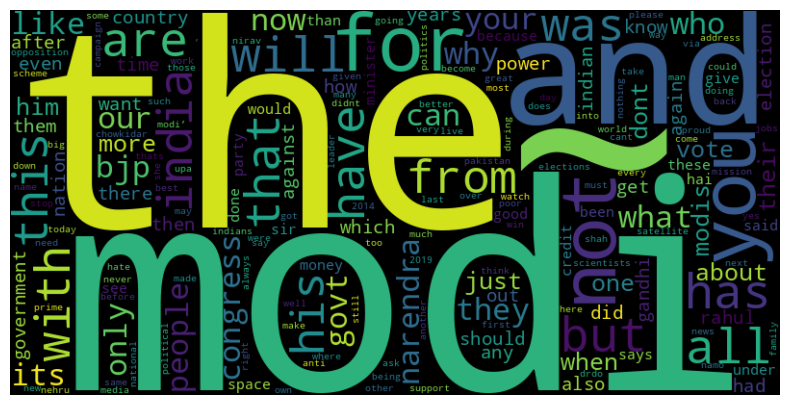

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
token_freq = {}
for token in tokens:
    if token in token_freq:
        token_freq[token] += 1
    else:
        token_freq[token] = 1
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(token_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

***Visualization***

In [15]:
import matplotlib.pyplot as plt

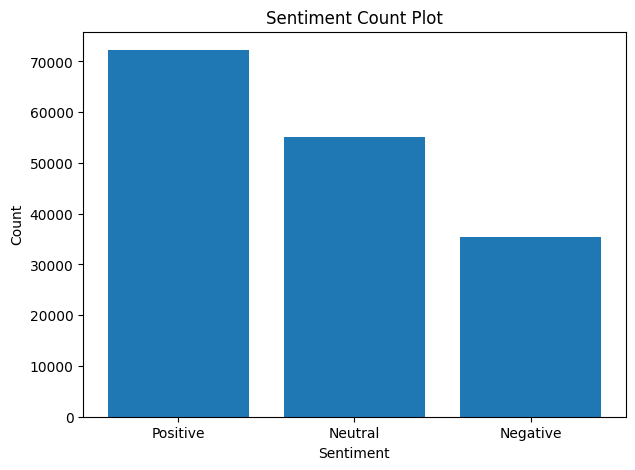

In [16]:
sentiment_counts =df['Sentiment'].value_counts()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(7, 5))

# Plot the count plot using Matplotlib
ax.bar(sentiment_counts.index, sentiment_counts.values)

# Customize the plot
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Sentiment Count Plot')

# Show the plot
plt.show()

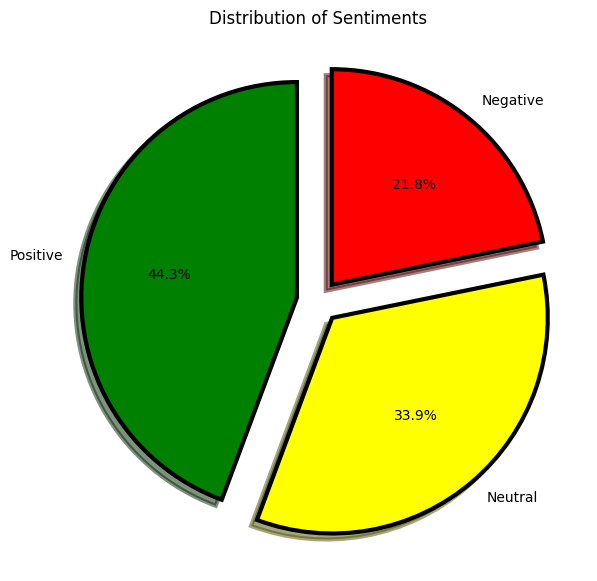

In [17]:
tags = df['Sentiment'].value_counts()


# Colors for the pie chart wedges
colors = ("green", "yellow", "red")

# Wedge properties
wp = {'linewidth': 3, 'edgecolor': "black"}

# Calculate the number of unique sentiment categories
num_categories = len(tags)

# Explode the wedges (separate a few slices)
explode = [0.1] * num_categories

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(tags, labels=tags.index, autopct='%1.1f%%', shadow=True,
        colors=colors, startangle=90, wedgeprops=wp, explode=explode)

# Set the title
plt.title('Distribution of Sentiments')

# Show the pie chart
plt.show()

Vectorizing ***Data***

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer



# Step 3: Vectorize Text Data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Choose the number of features as needed
X = tfidf_vectorizer.fit_transform(df['talks']).toarray()
y = df['Sentiment']

***Training Model***

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Create And Train Logistic Regression Model***

In [21]:
# Step 4: Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate the model's performance on the training data
y_pred_train = model.predict(X_train)

# Print accuracy and other metrics
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Classification Report:")
print(classification_report(y_train, y_pred_train))
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.8380594439117929
Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.63      0.72     28357
     Neutral       0.77      0.97      0.86     44144
    Positive       0.90      0.84      0.87     57874

    accuracy                           0.84    130375
   macro avg       0.84      0.81      0.82    130375
weighted avg       0.85      0.84      0.83    130375

Confusion Matrix:
[[17788  6221  4348]
 [  465 42891   788]
 [ 2593  6698 48583]]


In [22]:
# Create a new text input to predict
new_text = ['''With the implementation of National Education Policy,
the Centre has ushered in a new era of Educated India. Grants have been announced for the development of many educational institutes including IIIT and IIT in
            Dharwad, making Dharwad a representative of Karnataka in the field of education.
            government is making education affordable for children of all classes.''']

# Vectorize the new text input using the same TF-IDF vectorizer
new_text_vectorized = tfidf_vectorizer.transform(new_text).toarray()

# Predict using the trained logistic regression model
predicted_label = model.predict(new_text_vectorized)

print("Predicted Label:", predicted_label)

Predicted Label: ['Positive']


**Training of another model:-**

In [44]:
X = df['talks'].values.astype('U')
y = df['Sentiment'].values.astype('U')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,  ConfusionMatrixDisplay

In [46]:
pipe = Pipeline([('tfidf_vectorizer',TfidfVectorizer(lowercase = True, stop_words = 'english',analyzer = 'word')), ('naive_bayes', MultinomialNB())])
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

pipe.fit(list(X_train), list(y_train))
y_pred = pipe.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))
pipe['naive_bayes']

[[ 1375    49    57]
 [  438  5576   556]
 [ 8840 10938 21062]]
0.5729684399991819


MultinomialNB()

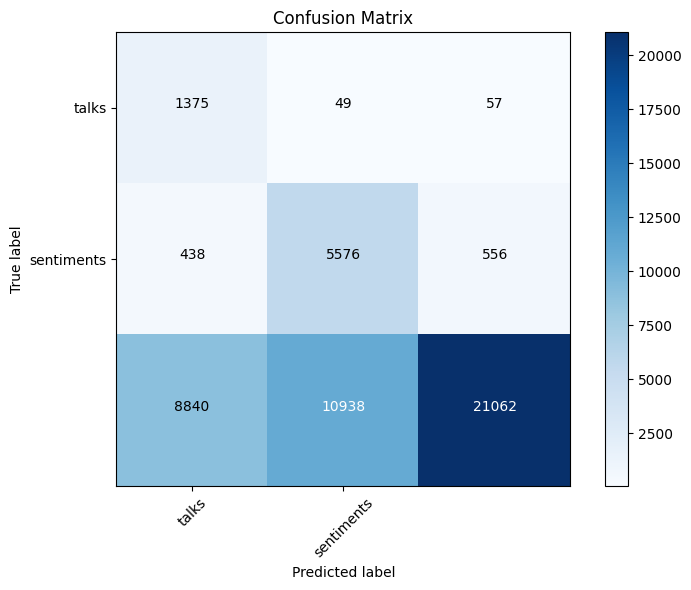

In [51]:
import numpy as np
import matplotlib.pyplot as plt

cm  = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['talks', 'sentiments']  # Update with your class labels
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [65]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [66]:
labels = pd.get_dummies(df.Sentiment)
labels.columns = ["negative", "neutral", "positive"]
labels.head()

,negative,neutral,positive
0,True,False,False
1,False,True,False
2,False,False,True
3,False,False,True
4,False,False,True


In [67]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

# Convert text to sequences
X_sequences = tokenizer.texts_to_sequences(X)

# Pad sequences to have consistent length
X_padded = pad_sequences(X_sequences)

# Split the data into training and testing sets
X_train_seq, X_test_seq, y_train, y_test = train_test_split(X_padded, labels, test_size=0.3, stratify=labels)

In [68]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=X_padded.shape[1]),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(3, activation='softmax')  # Assuming 3 classes: negative, neutral, positive
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/5
1426/1426 [==============================] - 541s 378ms/step - loss: 0.3196 - accuracy: 0.8841 - val_loss: 0.1855 - val_accuracy: 0.9460
Epoch 2/5
1426/1426 [==============================] - 523s 367ms/step - loss: 0.1024 - accuracy: 0.9696 - val_loss: 0.1365 - val_accuracy: 0.9597
Epoch 3/5
1426/1426 [==============================] - 538s 377ms/step - loss: 0.0526 - accuracy: 0.9834 - val_loss: 0.1273 - val_accuracy: 0.9616
Epoch 4/5
1426/1426 [==============================] - 543s 381ms/step - loss: 0.0305 - accuracy: 0.9903 - val_loss: 0.1710 - val_accuracy: 0.9460
Epoch 5/5
1426/1426 [==============================] - 528s 370ms/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.1733 - val_accuracy: 0.9598


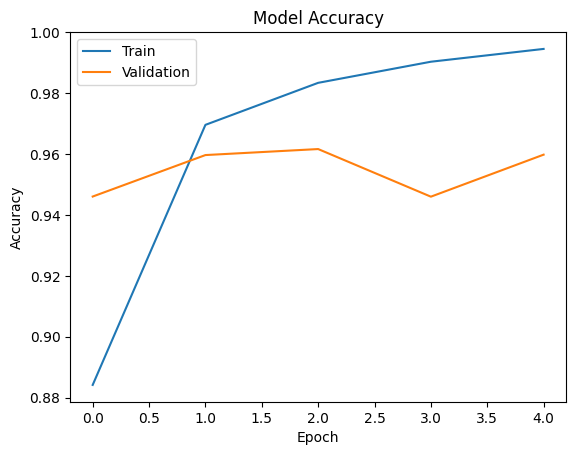

In [69]:
history =model.fit(X_train_seq, y_train, epochs=5, batch_size=64, validation_split=0.2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [70]:

loss, accuracy = model.evaluate(X_test_seq, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

1528/1528 [==============================] - 32s 21ms/step - loss: 0.1659 - accuracy: 0.9608
Test Loss: 0.1659448891878128, Test Accuracy: 0.9608312249183655
